In [1]:
# подгрузка необходимых модулей для визуализации и работы с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re

In [2]:
train_1 = pd.read_csv('train_1.csv', sep='";"', engine='python',
                     names=['id', 'prod_type', 'trans_dttm',
                           'mcc_code', 'sum_trans','location_name'
                           ], parse_dates=['trans_dttm']).drop(index=[0])

train_2 = pd.read_csv('train_2.csv', sep='";"', engine='python',
                      names=['id', 'mm_in_bank', 'mm_w_card',
                           'age', 'gender','education_level',
                           'martial_status', 'dependant_cnt',
                           'income_main_amt', 'reg_code'
                           ]).drop(index=[0])

In [3]:
train_1.head(5)

,id,prod_type,trans_dttm,mcc_code,sum_trans,location_name
1,"""500000001271933224",1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
2,"""500000001089710588",2,20.08.2021 18:00:39,7311,503,"AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS"""
3,"""500000000004725733",1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
4,"""500000000608267511",2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUS...
5,"""500000001639102687",1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...


In [4]:
train_2.head(5)

,id,mm_in_bank,mm_w_card,age,gender,education_level,martial_status,dependant_cnt,income_main_amt,reg_code
1,"""500000000000003702",5,5,35,2,3,3,0,87000,"9"""
2,"""500000000000004100",108,0,34,2,3,3,2,180000,"31"""
3,"""500000000000004523",0,0,35,1,1,3,0,61000,"38"""
4,"""500000000000004529",6,6,38,1,5,3,0,318000,"42"""
5,"""500000000000004718",18,5,39,1,-1,3,0,34000,"81"""


In [5]:
data = train_1.merge(train_2, on='id')
data.head(10)

,id,prod_type,trans_dttm,mcc_code,sum_trans,location_name,mm_in_bank,mm_w_card,age,gender,education_level,martial_status,dependant_cnt,income_main_amt,reg_code
0,"""500000001271933224",1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...,14,14,24,2,-1,1,0,NaN,"32"""
1,"""500000001271933224",1,27.10.2021 18:20:16,5912,1028,APTEKA V SLOBODE.\2 BRIGADNAYA STR\SERPUKHOV\1...,14,14,24,2,-1,1,0,NaN,"32"""
2,"""500000001271933224",1,16.10.2021 19:56:56,5921,"164,79","SSSR\(142203), Moskovskaya obl, Serpuhov g, Vo...",14,14,24,2,-1,1,0,NaN,"32"""
3,"""500000001271933224",1,29.08.2021 18:52:41,5999,600,TABAK\5 BORISOVSKOE SH\SERPUKHOV\142200 RUS...,14,14,24,2,-1,1,0,NaN,"32"""
4,"""500000001271933224",1,18.10.2021 21:11:57,4814,80,YOTA SOTOVAYA SVYAZ \CHERTANOVO SEVERNOE D. ...,14,14,24,2,-1,1,0,NaN,"32"""
5,"""500000001271933224",1,16.08.2021 13:15:15,5977,104,MAGAZIN PODRUZHKA\113 VOROSHILOVA STR\SERPUKHO...,14,14,24,2,-1,1,0,NaN,"32"""
6,"""500000001271933224",1,18.10.2021 18:06:53,4121,206,"YANDEX.TAXI\UL.SADOVNICHESKAYA, D. 82, KORP. 2...",14,14,24,2,-1,1,0,NaN,"32"""
7,"""500000001271933224",1,13.10.2021 15:32:40,5993,750,TWOMAN\109-6 VOROSHILOVA STR\SERPUKHOV\142203 ...,14,14,24,2,-1,1,0,NaN,"32"""
8,"""500000001271933224",1,22.10.2021 18:16:55,5943,55,KANCTOVARY\2 BRIGADNAYA STR\SERPUKHOV\142200 ...,14,14,24,2,-1,1,0,NaN,"32"""
9,"""500000001271933224",1,22.10.2021 18:36:57,5732,20,NAVIGATOR\92 VOROSHILOVA STR\SERPUKHOV\142200 ...,14,14,24,2,-1,1,0,NaN,"32"""


In [6]:
data.drop(columns=['mcc_code', 'reg_code', 'mm_in_bank', 'id'], inplace=True)
data.head(5)

,prod_type,trans_dttm,sum_trans,location_name,mm_w_card,age,gender,education_level,martial_status,dependant_cnt,income_main_amt
0,1,31.10.2021 16:04:58,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...,14,24,2,-1,1,0,NaN
1,1,27.10.2021 18:20:16,1028,APTEKA V SLOBODE.\2 BRIGADNAYA STR\SERPUKHOV\1...,14,24,2,-1,1,0,NaN
2,1,16.10.2021 19:56:56,"164,79","SSSR\(142203), Moskovskaya obl, Serpuhov g, Vo...",14,24,2,-1,1,0,NaN
3,1,29.08.2021 18:52:41,600,TABAK\5 BORISOVSKOE SH\SERPUKHOV\142200 RUS...,14,24,2,-1,1,0,NaN
4,1,18.10.2021 21:11:57,80,YOTA SOTOVAYA SVYAZ \CHERTANOVO SEVERNOE D. ...,14,24,2,-1,1,0,NaN


In [7]:
data.isnull().sum()/len(data)*100

prod_type           0.000000
trans_dttm          0.000000
sum_trans           0.000000
location_name       0.000000
mm_w_card           0.000000
age                 0.000000
gender              0.000000
education_level     0.000000
martial_status      0.000000
dependant_cnt       0.000000
income_main_amt    47.898531
dtype: float64

In [8]:
data.drop(columns=['income_main_amt'], inplace=True)
data.head(5)

,prod_type,trans_dttm,sum_trans,location_name,mm_w_card,age,gender,education_level,martial_status,dependant_cnt
0,1,31.10.2021 16:04:58,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...,14,24,2,-1,1,0
1,1,27.10.2021 18:20:16,1028,APTEKA V SLOBODE.\2 BRIGADNAYA STR\SERPUKHOV\1...,14,24,2,-1,1,0
2,1,16.10.2021 19:56:56,"164,79","SSSR\(142203), Moskovskaya obl, Serpuhov g, Vo...",14,24,2,-1,1,0
3,1,29.08.2021 18:52:41,600,TABAK\5 BORISOVSKOE SH\SERPUKHOV\142200 RUS...,14,24,2,-1,1,0
4,1,18.10.2021 21:11:57,80,YOTA SOTOVAYA SVYAZ \CHERTANOVO SEVERNOE D. ...,14,24,2,-1,1,0


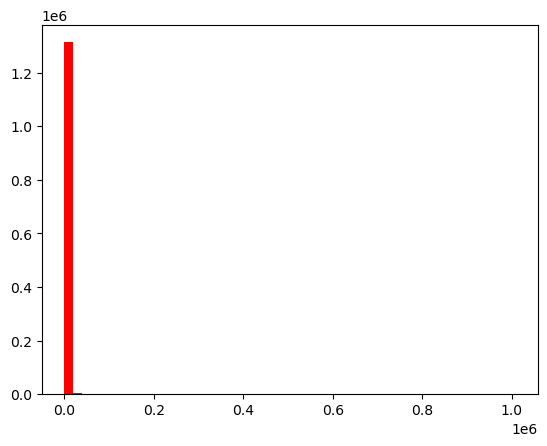

In [9]:
data['sum_trans'] = data['sum_trans'].str.replace(",",".").astype(np.float64)
data['sum_trans'].hist(bins=50,color='red');
plt.grid(False)

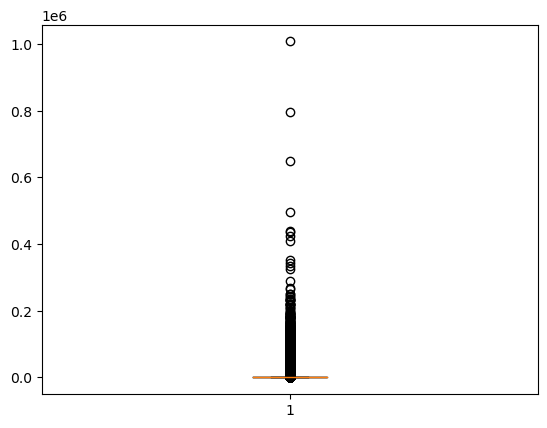

In [10]:
plt.boxplot(data['sum_trans']);

In [11]:
IQR = np.quantile (data['sum_trans'], .75)- np.quantile(data['sum_trans'], .25)
max_trans_sum = np.quantile(data['sum_trans'], .75) + 1.5*IQR
min_trans_sum = np.quantile(data['sum_trans'], .25) - 1.5*IQR
print(min_trans_sum, max_trans_sum)

-1099.0 2253.0


In [12]:
data.drop(index=data[data['sum_trans']>max_trans_sum].index, inplace=True)
data.shape

(1184173, 10)

In [13]:
data[data['sum_trans']==0]['sum_trans'].count()

0

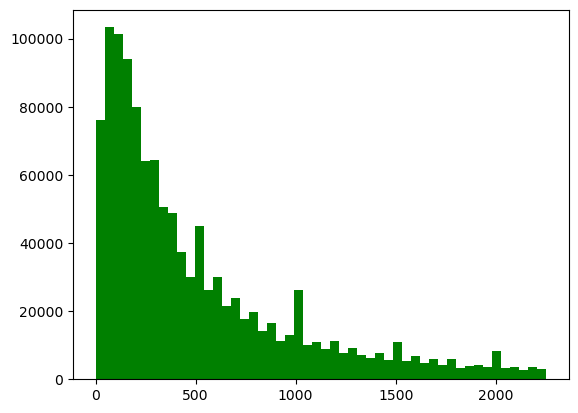

In [14]:
data['sum_trans'].hist(bins=50, color='green');
plt.grid(False);

In [15]:
data['age'].dtype

dtype('O')

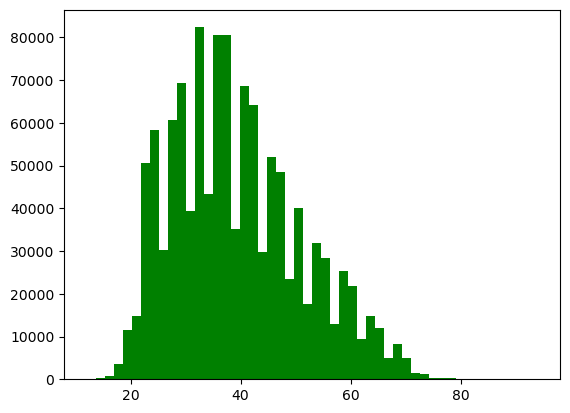

In [16]:
data['age']=data['age'].astype(np.float64)
data['age'].hist(bins=50, color='green');
plt.grid(False)

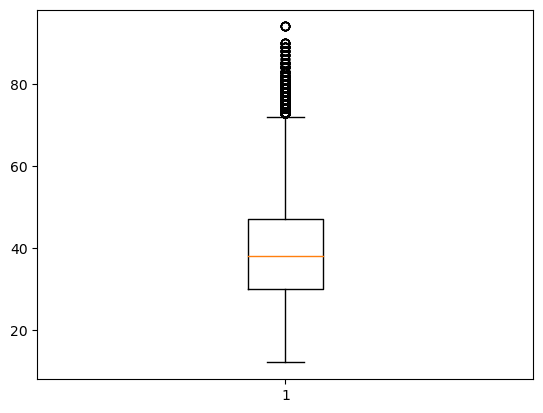

In [17]:
plt.boxplot(data['age']);

In [18]:
data[data['age']==0]['age'].count()

0

In [19]:
data['dependant_cnt'].dtype

dtype('O')

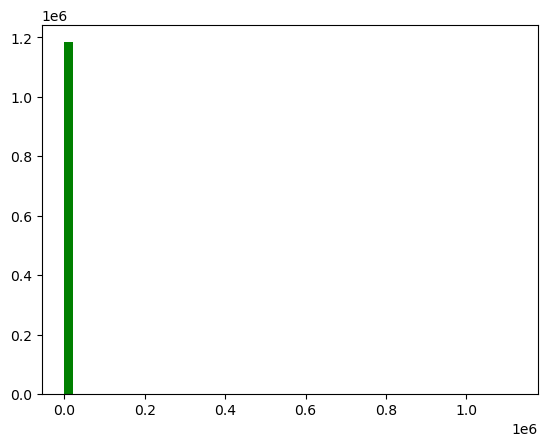

In [20]:
data['dependant_cnt']=data['dependant_cnt'].astype(np.int64)
data['dependant_cnt'].hist(bins=50, color='green');
plt.grid(False)

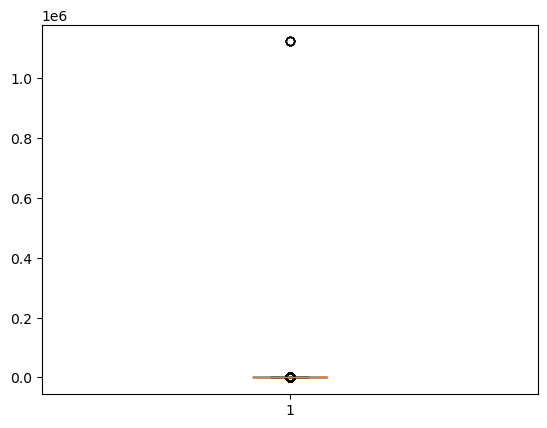

In [21]:
plt.boxplot(data['dependant_cnt']);

In [22]:
IQR=np.quantile(data['dependant_cnt'], .75) - np.quantile(data['dependant_cnt'], .25)
max_trans_sum = np.quantile(data['dependant_cnt'], .75)+ 1.5*IQR
min_trans_sum = np.quantile(data['dependant_cnt'], .25)- 1.5*IQR
print(min_trans_sum, max_trans_sum)

0.0 0.0


In [23]:
np.sort(data['dependant_cnt'].unique())

array([      0,       1,       2,       3,       4,       5,       6,
             7,      10,      11,      14,      15,      16,      36,
            60,      72,      89,     100,     120,     123,     124,
           150,     192,     240,     256,     264,     300,     360,
           389,     444,    1984, 1122016], dtype=int64)

In [24]:
data[data['dependant_cnt']>7]['dependant_cnt'].count()/len(data)*100

0.013004856553898797

In [25]:
data['gender'].unique()

array(['2', '1', '-1'], dtype=object)

In [26]:
data[data['gender']=='-1']['gender'].count()/len(data)*100

0.04104130055321308

In [27]:
data.drop(index=data[data['gender']=='-1'].index, inplace=True)
data['gender']=data['gender'].astype(np.int64).replace({
    1:0,
    2:1
})
data['gender']

0          1
1          1
2          1
3          1
4          1
          ..
1320951    1
1320952    0
1320953    1
1320954    1
1320955    0
Name: gender, Length: 1183687, dtype: int64

In [28]:
data['education_level'].unique()

array(['-1', '5', '3', '1', '4', '6', '2'], dtype=object)

In [29]:
data['education_level']=data['education_level'].astype(np.int64)

In [30]:
data['martial_status'].unique()

array(['1', '3', '-1', '5', '4', '2'], dtype=object)

In [31]:
data['martial_status']=data['martial_status'].astype(np.int64)

In [32]:
data['store_name']=data['location_name'].apply(lambda x: x.replace(',', '\\').split('\\')[0].strip().lower())
data['store_name']

0                     vernyj 1263
1               apteka v slobode.
2                            sssr
3                           tabak
4             yota sotovaya svyaz
                    ...          
1320951    post rus.service.16981
1320952          pyaterochka 7737
1320953                       gsm
1320954     pay.mts.ru topup 3624
1320955                 viktoriya
Name: store_name, Length: 1183687, dtype: object

In [33]:
data.drop(columns=['location_name'], inplace=True)
data.head(5)

,prod_type,trans_dttm,sum_trans,mm_w_card,age,gender,education_level,martial_status,dependant_cnt,store_name
0,1,31.10.2021 16:04:58,411.45,14,24.0,1,-1,1,0,vernyj 1263
1,1,27.10.2021 18:20:16,1028.00,14,24.0,1,-1,1,0,apteka v slobode.
2,1,16.10.2021 19:56:56,164.79,14,24.0,1,-1,1,0,sssr
3,1,29.08.2021 18:52:41,600.00,14,24.0,1,-1,1,0,tabak
4,1,18.10.2021 21:11:57,80.00,14,24.0,1,-1,1,0,yota sotovaya svyaz


In [34]:
data[['data', 'time']] = data['trans_dttm'].str.split(' ', n=1, expand=True)
data.drop(columns=['trans_dttm', 'data', 'time'], inplace=True)
data.head(5)

,prod_type,sum_trans,mm_w_card,age,gender,education_level,martial_status,dependant_cnt,store_name
0,1,411.45,14,24.0,1,-1,1,0,vernyj 1263
1,1,1028.00,14,24.0,1,-1,1,0,apteka v slobode.
2,1,164.79,14,24.0,1,-1,1,0,sssr
3,1,600.00,14,24.0,1,-1,1,0,tabak
4,1,80.00,14,24.0,1,-1,1,0,yota sotovaya svyaz


In [35]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
le = LabelEncoder()

# Применяем LabelEncoder к каждой колонке в датасете
for column in data.columns:
    if data[column].dtype == 'object': # Проверяем, является ли колонка строковой
        data[column] = le.fit_transform(data[column])


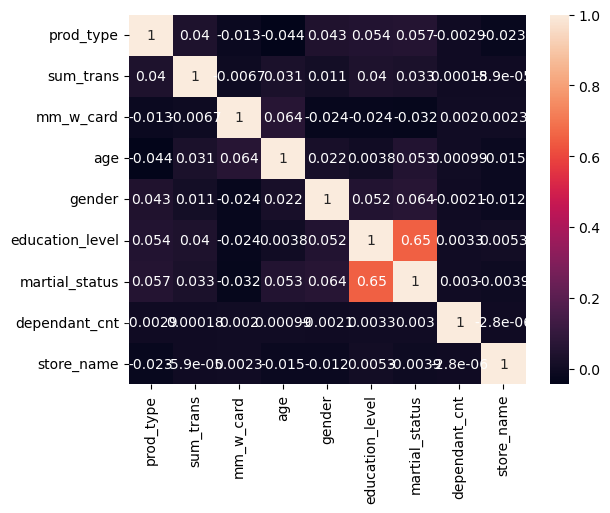

In [36]:
import seaborn as sns 

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True) 
plt.show()


Эта тепловая карта позволяет нам визуально представить корреляции между различными атрибутами в датасете. Это может быть полезно для выявления сильных или слабых корреляций между атрибутами, что может быть полезно при выборе признаков для модели машинного обучения или при анализе данных5


# МОДУЛЬ 2

In [37]:
print(data.shape[0])

1183687


Из за того, что в датасете более милиона строк, модель не сможет быстро обучиться, поэтому для экономии ценных ресурсов, я укоротила его до 300000 строк.

In [38]:
data = data.head(30000)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('store_name', axis=1), data['store_name'], test_size=0.2, random_state=42)

In [41]:
%%time

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# обучение моделей
svc = SVC()
svc.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

# оценка качества моделей
svc_acc = accuracy_score(y_test, svc.predict(X_test))
svc_recall = recall_score(y_test, svc.predict(X_test), average='weighted')
svc_f1 = f1_score(y_test, svc.predict(X_test), average='weighted')

rf_acc = accuracy_score(y_test, rf.predict(X_test))
rf_recall = recall_score(y_test, rf.predict(X_test), average='weighted')
rf_f1 = f1_score(y_test, rf.predict(X_test), average='weighted')

lr_acc = accuracy_score(y_test, lr.predict(X_test))
lr_recall = recall_score(y_test, lr.predict(X_test), average='weighted')
lr_f1 = f1_score(y_test, lr.predict(X_test), average='weighted')

MemoryError: could not allocate 3948412928 bytes